In [ ]:
'''
author: Ching-Yu Chiu (SunnyCYC)
email:  x2009971@gmail.com
'''

In [6]:
import os
import numpy as np
from pathlib import Path
import glob

import matplotlib.pyplot as plt
import acr_modules as acr_module
f_measure_threshold = 0.07
%matplotlib inline  

In [7]:
# esti_folder = './estimation_folder'
# gt_folder = './groundtruth_folder'
# acti_folder = './activation_folder'

### specify L
L=3
### specify annotation/estimation file name:
gt_file = './groundtruth_folder/Beethoven_Piano_Sonatas_31-3_4_LeungM05M.beats'
est_file = os.path.join('./estimation_folder/', os.path.basename(gt_file))
acti_file = os.path.join('./activation_folder/', os.path.basename(gt_file).replace('.beats', '.npy'))
beat_est = np.loadtxt(est_file)
beat_gt = np.loadtxt(gt_file)
acti_max = np.load(acti_file).max(axis=1)


### evaluate one song
acr_res = acr_module.anyMetLev_eval(beat_est, beat_gt[:, 0], tolerance = 0.07, L =L,
              half_offbeat = True, double= True, half= True, 
              third_offbeat = True, triple= True, third=True, 
              quadruple = True,
              return_dict = False, quarter = True,
              return_cframe = True, FPS = 100)
### print single song evaluation results
for k, v in acr_res['all_ratios'].items():
    print("{:16s}:{:.2f}".format(k, v))

Ratio-onbeat    :0.40
Ratio-offbeat   :0.00
Ratio-double    :0.02
Ratio-triple    :0.00
Ratio-quadruple :0.00
Ratio-half      :0.03
Ratio-third     :0.00
Ratio-quarter   :0.00
Ratio-any       :0.45


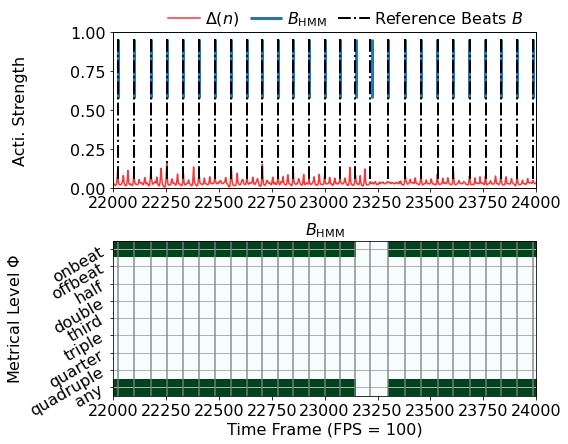

In [8]:
### Visualization
## specify xlim of the plot:
start_frame = 22000 # frames
dur = 2000 # frames
end_frame = start_frame + dur
## extract bool array from acr_res
c_list = []
for c_type in acr_module.c_types:
    c_list.append(acr_res['correct_frame_results'][c_type][:, np.newaxis])
c_array = np.array(c_list).squeeze()
c_dicts = {'HMM': c_array}
## organize beat estimation as dict
est_dict = {'HMM':beat_est}


fig = acr_module.raioPlotter(c_dicts, est_dict, beat_gt[:, 0], title = None,
            start_frame = start_frame, end_frame = end_frame, 
            constrained_layout= False, acti = acti_max, 
            c_types =acr_module.c_types,
            )